# Kalman-Filter

LV Elektronische Steuerungs- und Regelungssysteme SS2020 (Master ETuIT, HSM, (c) Christoph Menz) 

***

Um einen Zustandsregler einsetzen zu können, muss der Zustandsvektor vollständig verfügbar sein. Ist dieser nicht vollständig messbar, kann versucht werden, diesen mittels eines Beobachters zu rekonstruieren. Neben dem Luenberger-Beobachter kann hierfür auch ein Kalman-Filter genutzt werden. Die Systemstruktur ist analog zu der des Luenberger-Beobachters, jedoch basiert die Herleitung auf stochastischen Eigenschaften des Systems. Neben dem Einsatz als Beobachter wird das Kalmanfilter auch anderen Zwecken, z.B. der Aufbereitung und Glättung von Messwerten oder der Fusion von Sensordaten genutzt.    


***

### Grundlagen

siehe Folien und entsprechende Verweise

***

### Beispiel

$
F = ma + kv \hspace{1em}(m = 1, k = 1) 
$

$
a = - v + F
$

$
x_1 = s \\
x_2 = v \\
u = F
$

$
\dot{x}_1 = x_2 \\
\dot{x}_2 = - x_2 + u
$

$
A = \begin{bmatrix} 0 & 1 \\ 0 & -1 \end{bmatrix} 
$

$
B = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [4]:
A = np.array([[0,1],[0,-1]])
B = np.array([[0],[1]])
C = np.array([[1,0],[0,1]])
print(A)
print(B)
print(C)

[[ 0  1]
 [ 0 -1]]
[[0]
 [1]]
[[1 0]
 [0 1]]


In [6]:
dt = 0.01 
t = np.arange(0,1+dt,dt) 
print(t)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [8]:
u = 1 + np.zeros(len(t)) # Eingangsgröße 
x = np.zeros([len(t)+1,2]) # Zustandsgrößen
z = np.zeros([len(t),2]) # Messungen

# Geschätzter Zustand
xest = np.zeros([len(t)+1,2]) # Zustandsgrößen

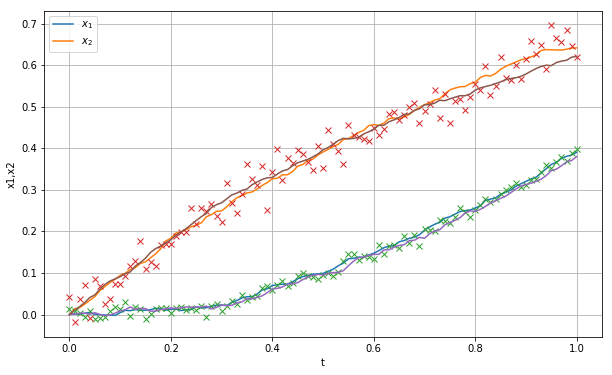

In [12]:
# Kovarianzen Prozess
Q = np.array([[1e-5,0],[0,1e-5]])
# Kovarianzen Messung
R = np.array([[1e-4,0],[0,1e-3]])
# Kovarianzen Start
P = np.array([[0,0],[0,0]])

for k in range(len(t)):

    # KF-Predict -> Vorhersage des Zustands und der Gesamtvarianz
    dx = np.dot(A,xest[k]) + np.dot(B,[u[k]])
    xp = xest[k] + dx*dt
    Pp = np.dot(np.dot(A,P),np.array(A).T) + Q # APA'+ Q
    
    # Messung
    z[k] = np.dot(C,x[k])
    # Messrauschen
    v = np.dot(np.sqrt(R),np.random.randn(2))
    z[k] += v
    
    # KF-Correct -> Korrektur der Vorhersage  
    inv = np.linalg.inv(np.dot(np.dot(C,Pp),C.T) + R)
    K = np.dot(np.dot(Pp,np.array(C).T),inv)
    #xest[k+1] = xp + np.dot(K, (z[k] - np.dot(C,xp.T).T).T)
    xest[k+1] = xp + np.dot(K, z[k] - np.dot(C,xp))
    P = np.dot(np.eye(2)-np.dot(K,C),Pp)
    
    # System simulieren (Euler)
    dx = np.dot(A,x[k]) + np.dot(B,u[k]).T
    x[k+1] = x[k] + dx*dt
    # Prozessrauschen
    w = np.dot(np.sqrt(Q),np.random.randn(2))
    x[k+1] += w 

    
plt.figure(figsize=(10,6))
plt.plot(t, x[:len(t),0])
plt.plot(t, x[:len(t),1])
plt.plot(t, z[:len(t),0],'x')
plt.plot(t, z[:len(t),1],'x')
plt.plot(t, xest[:len(t),0])
plt.plot(t, xest[:len(t),1])
plt.grid()
plt.xlabel('t')
plt.ylabel('x1,x2')
plt.legend(['$x_1$','$x_2$'])
plt.show()